## Real-time selective sequencing using nanopore technology. Figures and Analysis

### Introduction

Figure S2

This jupyter notebook requires the R kernel. 

Each figure from the manuscript "Real-time seletive sequencing using nanopore technology" is reproduced in this notebook. Figures are presented by panel and in the order in which they are considered in the manuscript.

In [1]:
library(ggplot2)
library("gridExtra")
library("plyr")

### Figure S2 - Investigating the ability of DTW to place reads with respect to a reference.

In [4]:
par(mfrow = c(4, 2))

fname='data/figs2/out.txt'

#-------------------------------------------------------------------------------- 
# Plot labels

titles = c( 'Lambda Synthetic Reads', 'Lambda Amp3 Reads RU21')

normText = c("Un-normalised", "Normalised")

letters = c("A", "B", "C", "D", "E", "F", "G", "H")

a<-read.table(file=fname, sep=',', header=F)

colnames(a) <- c(
	"ReadFolder", "Normalise", "Chapter", "File", "Amplicon"
		, "winSz", "Len", "qrySz", "Offset"
		, "Read", "Ref", "Time_t", "trg", "Pos", "outBy", "read_t_Success"
		, "Read_", "Ref_", "Time_c", "trg_", "Pos_", "outBy"
		, "read_c_Success_", "dim", "quasi2d"
		)

# Total time taken on template and complement ...
a$Time <- a$Time_t + a$Time_c


#a <- a[ a$Pos ! = -1 , ]
#a$ReadFolder <- factor(a$ReadFolder)
#a$Normalise <- factor(a$Normalise)

#summary(a)




[1] "synthetic"                                    
[2] "../../lambda_raw_reads_all/Amplicon_4070-5989"
[1] " n" " y"


The following objects are masked from b (pos = 3):

    Amplicon, Chapter, dim, File, Len, Normalise, Offset, outBy, outBy,
    Pos, Pos_, qrySz, quasi2d, Read, Read_, read_c_Success_,
    read_t_Success, ReadFolder, Ref, Ref_, Time, Time_c, Time_t, trg,
    trg_, winSz

The following objects are masked from b (pos = 4):

    Amplicon, Chapter, dim, File, Len, Normalise, Offset, outBy, outBy,
    Pos, Pos_, qrySz, quasi2d, Read, Read_, read_c_Success_,
    read_t_Success, ReadFolder, Ref, Ref_, Time, Time_c, Time_t, trg,
    trg_, winSz

The following objects are masked from b (pos = 5):

    Amplicon, Chapter, dim, File, Len, Normalise, Offset, outBy, outBy,
    Pos, Pos_, qrySz, quasi2d, Read, Read_, read_c_Success_,
    read_t_Success, ReadFolder, Ref, Ref_, Time, Time_c, Time_t, trg,
    trg_, winSz

The following objects are masked from b (pos = 6):

    Amplicon, Chapter, dim, File, Len, Normalise, Offset, outBy, outBy,
    Pos, Pos_, qrySz, quasi2d, Read, Read_, read_c_Success_,

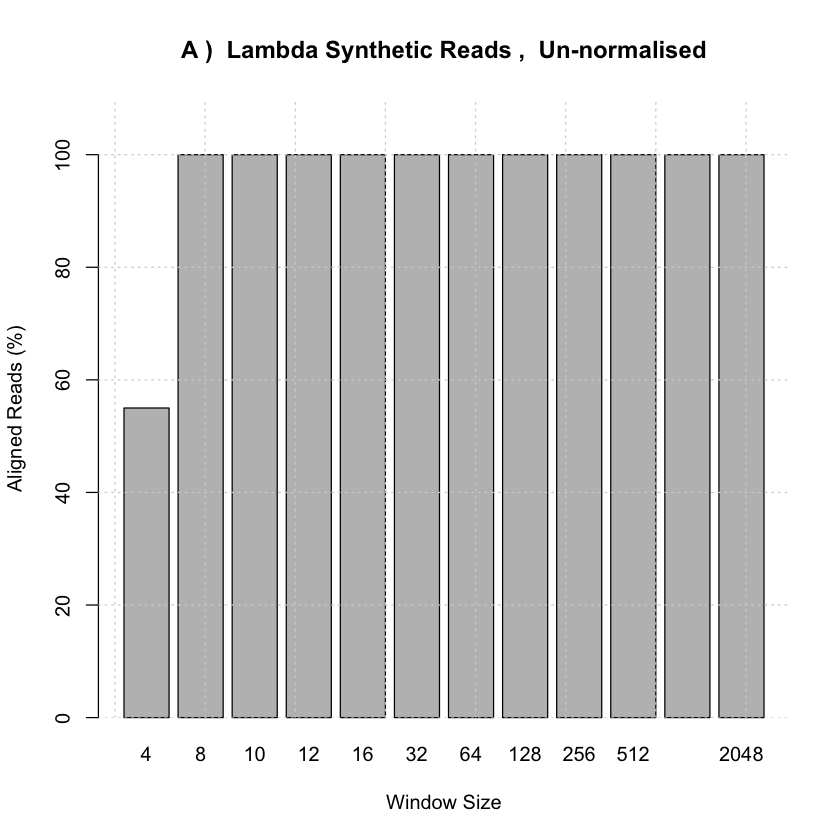

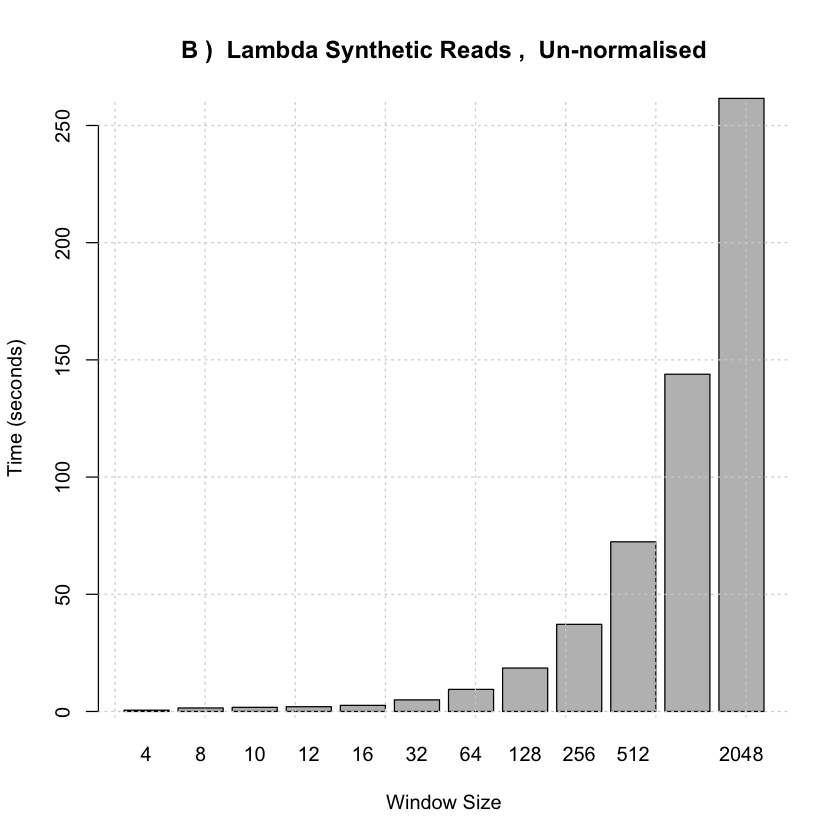

The following objects are masked from b (pos = 3):

    Amplicon, Chapter, dim, File, Len, Normalise, Offset, outBy, outBy,
    Pos, Pos_, qrySz, quasi2d, Read, Read_, read_c_Success_,
    read_t_Success, ReadFolder, Ref, Ref_, Time, Time_c, Time_t, trg,
    trg_, winSz

The following objects are masked from b (pos = 4):

    Amplicon, Chapter, dim, File, Len, Normalise, Offset, outBy, outBy,
    Pos, Pos_, qrySz, quasi2d, Read, Read_, read_c_Success_,
    read_t_Success, ReadFolder, Ref, Ref_, Time, Time_c, Time_t, trg,
    trg_, winSz

The following objects are masked from b (pos = 5):

    Amplicon, Chapter, dim, File, Len, Normalise, Offset, outBy, outBy,
    Pos, Pos_, qrySz, quasi2d, Read, Read_, read_c_Success_,
    read_t_Success, ReadFolder, Ref, Ref_, Time, Time_c, Time_t, trg,
    trg_, winSz

The following objects are masked from b (pos = 6):

    Amplicon, Chapter, dim, File, Len, Normalise, Offset, outBy, outBy,
    Pos, Pos_, qrySz, quasi2d, Read, Read_, read_c_Success_,

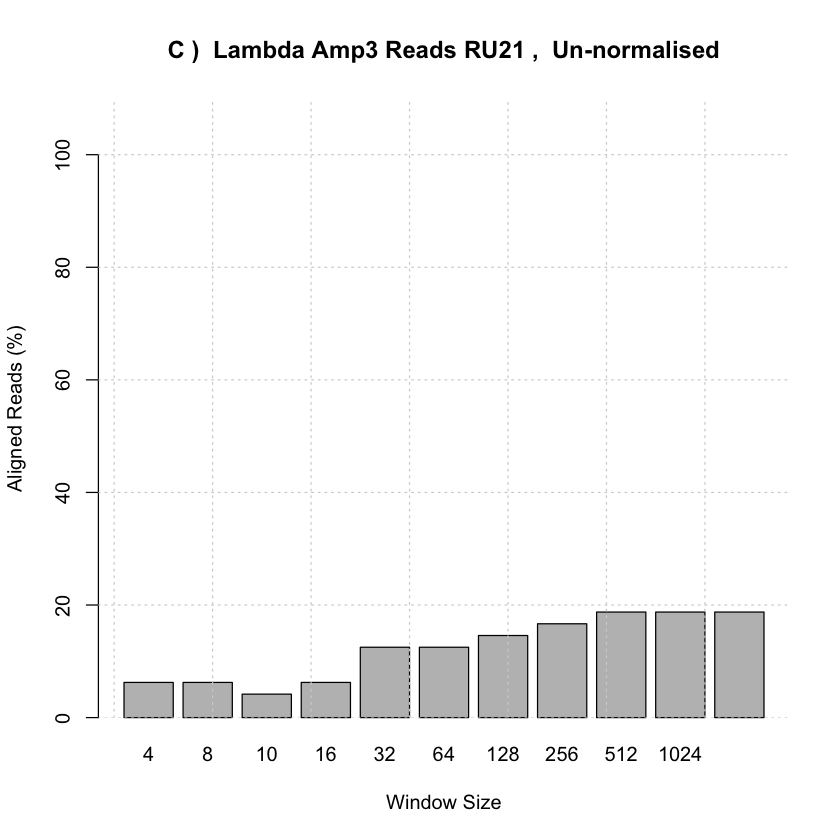

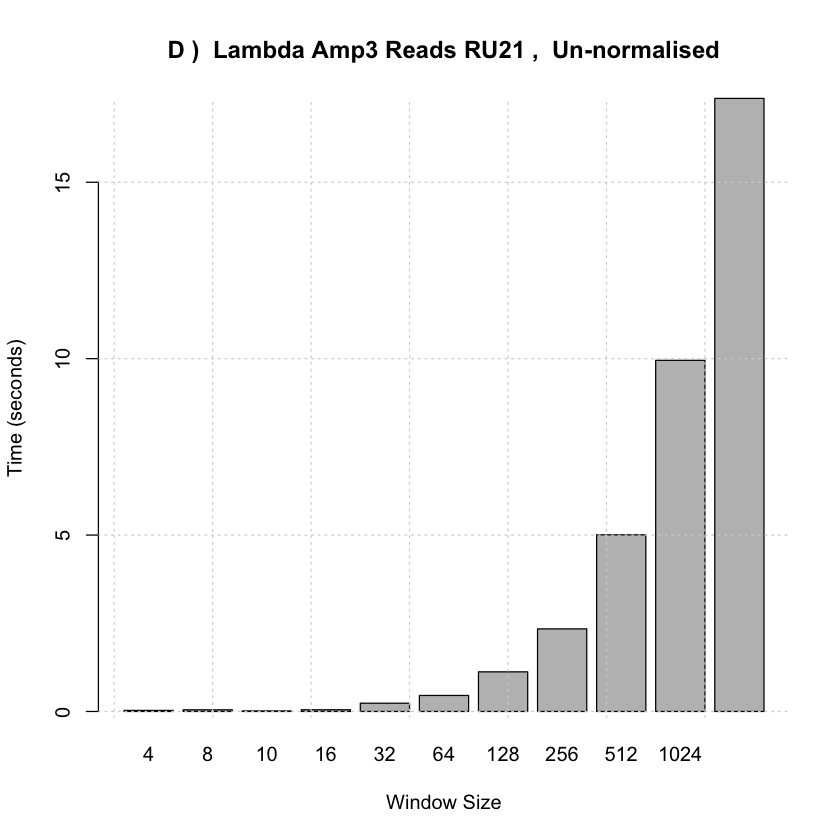

The following objects are masked from b (pos = 3):

    Amplicon, Chapter, dim, File, Len, Normalise, Offset, outBy, outBy,
    Pos, Pos_, qrySz, quasi2d, Read, Read_, read_c_Success_,
    read_t_Success, ReadFolder, Ref, Ref_, Time, Time_c, Time_t, trg,
    trg_, winSz

The following objects are masked from b (pos = 4):

    Amplicon, Chapter, dim, File, Len, Normalise, Offset, outBy, outBy,
    Pos, Pos_, qrySz, quasi2d, Read, Read_, read_c_Success_,
    read_t_Success, ReadFolder, Ref, Ref_, Time, Time_c, Time_t, trg,
    trg_, winSz

The following objects are masked from b (pos = 5):

    Amplicon, Chapter, dim, File, Len, Normalise, Offset, outBy, outBy,
    Pos, Pos_, qrySz, quasi2d, Read, Read_, read_c_Success_,
    read_t_Success, ReadFolder, Ref, Ref_, Time, Time_c, Time_t, trg,
    trg_, winSz

The following objects are masked from b (pos = 6):

    Amplicon, Chapter, dim, File, Len, Normalise, Offset, outBy, outBy,
    Pos, Pos_, qrySz, quasi2d, Read, Read_, read_c_Success_,

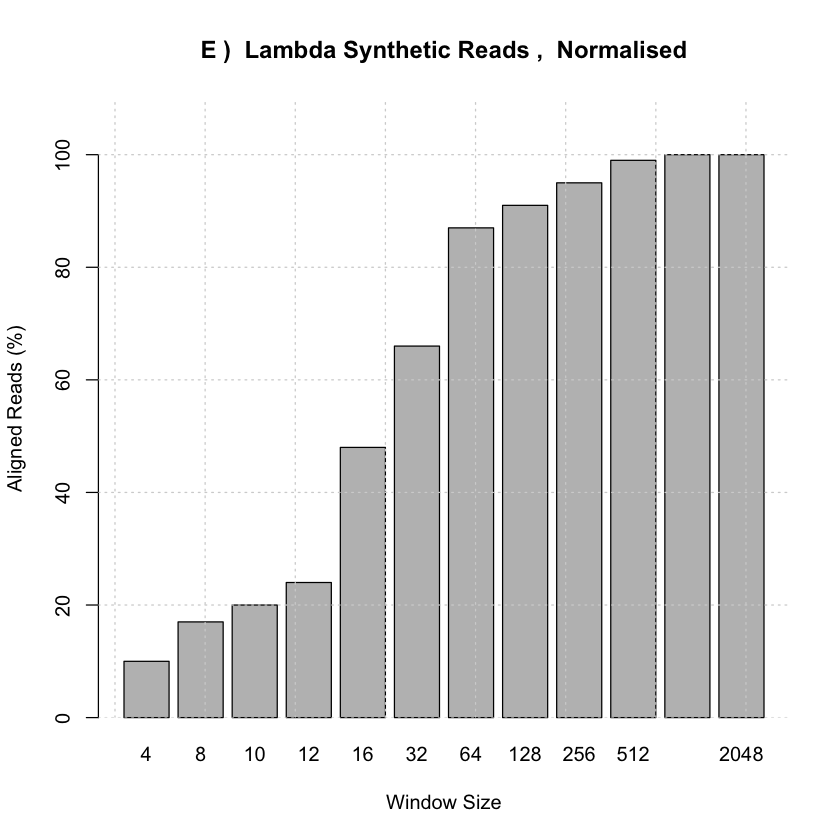

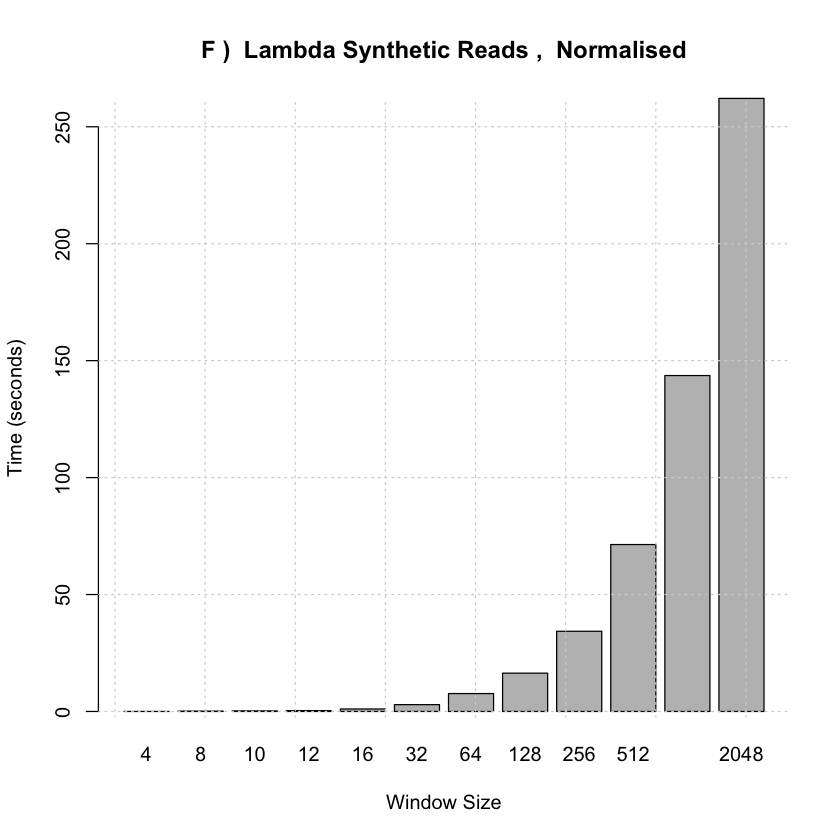

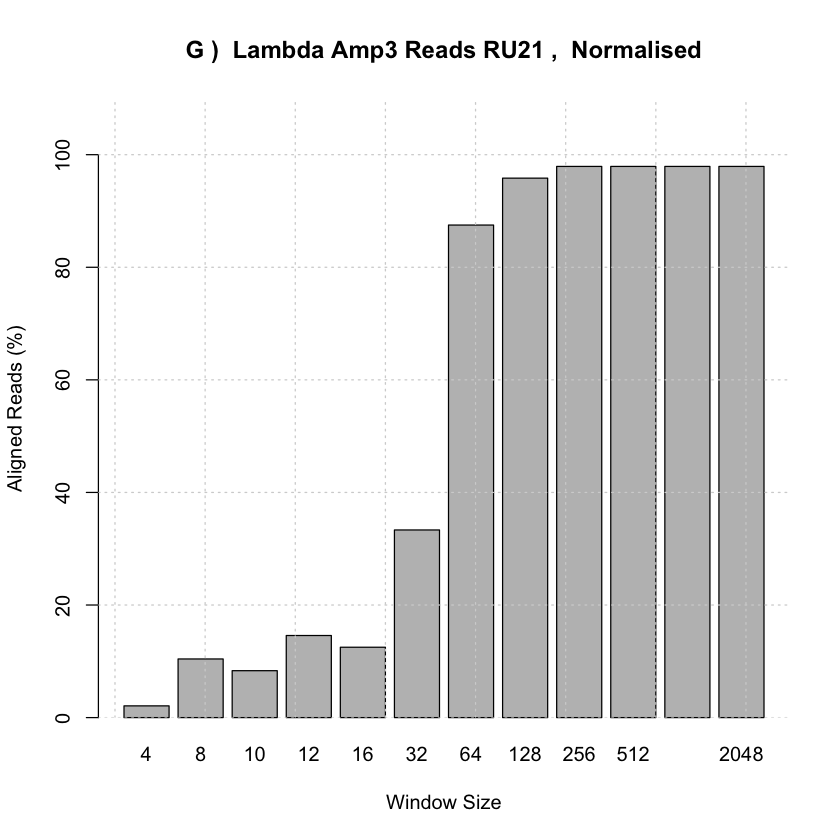

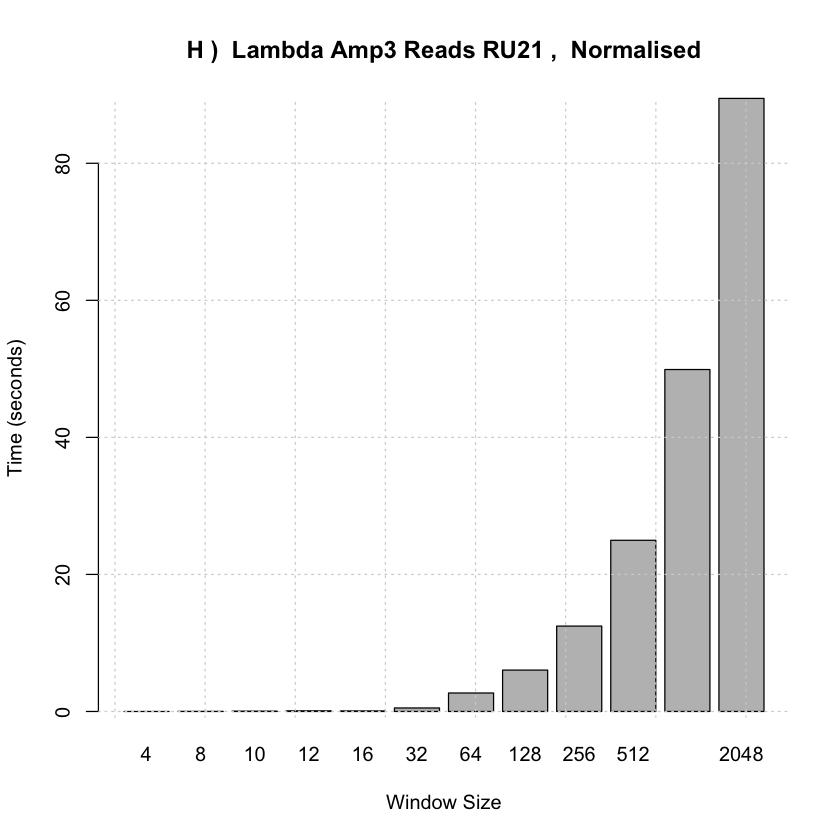

In [8]:
# Loop through the folders and variations (normalised / un-normalised) ...
 
folders = rev(levels(a$ReadFolder))
print(folders)
 
normalisations = levels(a$Normalise)
print(normalisations)

 
for (plotType in c('Unstacked')){#, 'Stacked')) {
	# Unstacked -- Plot only successful reads .. 
	# Stacked -- Plot both success and failed reads
	#print(plotType)
 
 
	# NB R counts list elements starting from 1 ..
	j = 1 # Index into list of letters for labeling plots 
 
	for (n in normalisations) {
		for (f in folders) {
		
			if (f == "synthetic") numReads = 100 else numReads = 48
			#print(numReads)
		
			folderNum = which(folders == f)
			#print(f)
			normNum = which(normalisations == n)
			#print(n)
		
			# Get relevant subset of data ...
			b <- a[ a$ReadFolder == f 
				& a$Normalise == n
				, ] 
		
			if (plotType == 'Unstacked') 
				b <- b[ b$read_t_Success == ' True', ] # NB space ..
		
			attach(b)
			summary(b)
		
			# Cross tabulate the data ....
			x0 <- xtabs(~winSz + Read + Ref + winSz)
			#print(ftable(x0, col.vars = c(2, 3))) 
		
			#-------------------------------------------
			# Plot "Read Counts" ..
		
			# Set it up ...
			txt <- paste( letters[j], ") "
					, titles[folderNum] , ", "
					, normText[normNum]
					)
			#print(txt)
		
		
			if (plotType == 'Unstacked') {
				xc <- xtabs(~winSz) 
				m <- (as.matrix(t(xc)) / numReads) * 100 # As % ..
				pal = 'grey'
				yLim = c(0, 110)
				yLab = 'Aligned Reads (%)'
			}
			else {
				xc <- xtabs(~winSz + read_t_Success) 
				m <- t(as.matrix(xc))
				m <- prop.table(m, margin = 2)
				pal = heat.colors(length(rownames(m)))
				yLim = c(0, 1)
				yLab = 'Proportion Reads'
			}
		
			# Do plot ...
			barplot(m
				, beside = F
				, col = pal
				, ylim = yLim
				, ylab = yLab
				, xlab = 'Window Size'
				, main = txt
				)
			grid()
			j = j + 1
			
			#-------------------------------------------
			# Plot "Read Times" ..
		
			# Set it up ...
			txt <- paste( letters[j], ") "
					, titles[folderNum] , ", "
					, normText[normNum]
					)
			#print(txt)
		
			if (plotType == 'Unstacked') {
				xt <- xtabs(Time~winSz)
				m <- t(as.matrix(xt))
				pal = 'grey'
			}
			else {
				xt <- xtabs(Time~winSz + read_t_Success) 
				m <- as.matrix(t(xt))
				pal = heat.colors(length(rownames(m)))
			}
		
			# Do plot ...
			barplot(m
				, beside = F, 
				, col = pal
				, ylab = 'Time (seconds)'
				, xlab = 'Window Size'
				, main = txt
				)
			grid()
			j = j + 1
		
			#-------------------------------------------
		
		}
	}
}
		
#-------------------------------------------------------------------------------- 
# End ...
            